In [9]:
## Loading relevant modules
import numpy as np 
%matplotlib inline 
from IPython.display import Image
from IPython.core.display import HTML 

### Sampling from Discrete Distributions

#### Bernoulli Random Variable

In [12]:
n        = 1 #Bernoulli random variable
p        = 0.9
nsamples = 10
samples  = np.random.binomial(n, p, size=(nsamples,))
print samples

[1 1 1 1 1 0 1 1 1 1]


#### Multinomial Random Variable

In [13]:
nsamples = 10
n        = 1 #number of draws from the multinomial distribution
p        = [0.2,0.7,0.1] #K = 3 or generally len(p)
samples  = np.random.multinomial(n, p, size=(nsamples,)).squeeze()
#Each row represents a sample where 1 indicates the 
#position of the elements of p that was selected
print samples
print np.argmax(samples,axis=1)

[[1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]
[0 1 1 0 1 0 1 1 1 2]


#### Poisson Random Variable

In [14]:
lmbda   = 4 #Mean parameter for the poisson distribution
nsamples= 10
samples = np.random.poisson(lmbda, size=(nsamples,))
print samples

[4 3 4 2 5 2 5 5 5 4]


In [8]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg")

###  Sampling from Continuous Distributions

In [16]:
#Sample from a univariate normal distribution
mu      = 5
var     = 3
nsamples= 10
samples = np.sqrt(var) * np.random.randn(nsamples,) + mu
print samples

[ 4.57698427  5.94495258  2.82706266  5.13924964  4.69725092  4.48572921
  6.43219318  3.04557557  2.66665983  5.49346157]


###  Multivariate distributions

In [17]:
#Some code to enable plotting
%matplotlib inline
import matplotlib.pylab  as plt
import matplotlib.tri as tri
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.mlab import bivariate_normal
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

"""
Credits: This code is based ***heavily*** on:
http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/

"""

# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])

def draw_pdf_contours(dist, idx=1, fig=None, nlevels=200, subdiv=4, **kwargs):
    import math
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    if fig is None:
        fig = plt.figure()
    ax = fig.add_subplot(1,2, idx)
    ax.tricontourf(trimesh, pvals, nlevels, **kwargs)
    ax.axis('equal')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 0.75**0.5)
    ax.axis('off')
    ax.set_title('2-Simplex')
    
def draw_gaussian(mux=0.,muy=0.,sigmax=1.,sigmay=1.,sigmaxy=0.,fig = None,idx=2):
    x   = np.linspace(-5, 5, 200)
    y   = x
    X,Y = np.meshgrid(x, y)
    Z   = bivariate_normal(X, Y,mux=mux,muy=muy,sigmax=sigmax,sigmay=sigmay,sigmaxy=sigmaxy)
    
    if fig is None:
        fig = plt.figure()
    ax  = fig.add_subplot(1,2,idx, projection='3d')
    ax.plot_surface(X, Y, Z,cmap='autumn')
    ax.set_title('Gaussian Distribution')

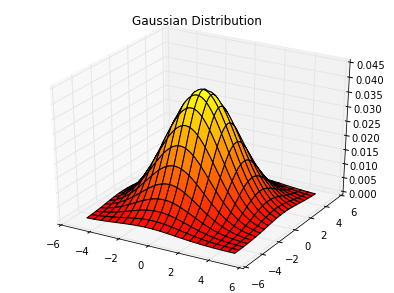

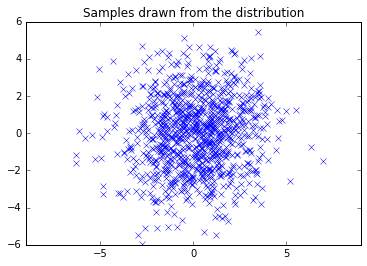

In [18]:
#Plotting a multivariate normal distribution
mux        =0.
muy        =0.
sigmay     =2.
sigmax     =2.
sigmaxy    =0.7
fig        = plt.figure(figsize=(15,5))
draw_gaussian(mux=mux, muy=muy, sigmax=sigmax, sigmay=sigmay, sigmaxy=sigmaxy,fig=fig)

mean = [mux, muy]
cov = [[sigmax**2, sigmaxy**2], [sigmaxy**2, sigmay**2]]  
x, y = np.random.multivariate_normal(mean, cov, 1000).T
plt.figure()
plt.plot(x, y, 'x')
plt.axis('equal')
plt.title('Samples drawn from the distribution')
plt.show()

Samples:  [[ 0.08896089  0.57881364  0.33222547]
 [ 0.18718671  0.18651591  0.62629738]
 [ 0.12466216  0.83400262  0.04133522]
 [ 0.19346322  0.21921285  0.58732393]
 [ 0.03805288  0.87134524  0.09060187]
 [ 0.18898404  0.50864091  0.30237505]
 [ 0.19035853  0.35237411  0.45726736]
 [ 0.11898355  0.13148558  0.74953087]
 [ 0.03850661  0.73546283  0.22603056]
 [ 0.56382214  0.36953128  0.06664658]]


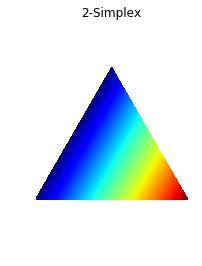

In [19]:
#Visualizing the Dirichlet distribution on the 2-simplex
alpha = [1,2,1] 
draw_pdf_contours(Dirichlet(alpha))
samples = np.random.dirichlet(alpha, size=(nsamples,))
print 'Samples: ',samples #Notice that the samples lie in the simplex and sum to 1

Samples:  [[ 0.55162956  0.11850145  0.32986899]
 [ 0.60932742  0.07929189  0.3113807 ]
 [ 0.21632047  0.38833384  0.39534569]
 [ 0.15418356  0.77528803  0.0705284 ]
 [ 0.21798865  0.46666367  0.31534768]
 [ 0.42311823  0.10510096  0.47178081]
 [ 0.17534854  0.2916148   0.53303667]
 [ 0.01293926  0.2389836   0.74807714]
 [ 0.35877423  0.11700937  0.5242164 ]
 [ 0.44720806  0.33044215  0.22234979]]


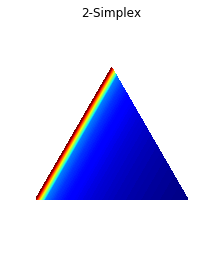

In [13]:
alpha = [1,0.8,1]
draw_pdf_contours(Dirichlet(alpha))
samples = np.random.dirichlet(alpha, size=(nsamples,))
print 'Samples: ',samples